<a href="https://colab.research.google.com/github/merveirem/MEF_BDA_Capstone_Project/blob/main/Merve_Irem_Boluk_Churn_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SET LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import plotly.graph_objects as go
from ipywidgets import widgets
import seaborn as sns

Display function provide to show multiple table in the one output.

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ks = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Key Dataset.csv")
s_cohort = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn_Subs_Table_Cohort.csv")
c_cohort = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn_Table_Cohort.csv")
c1_cohort = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn1_Cohort.csv")
c2_cohort = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn2_Cohort.csv")
s_agg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn_Subs_Table_Aggregate.csv")
c_agg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn_Table_Aggregate.csv")
c1_agg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn1_Aggregate.csv")
c2_agg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Churn2_Aggregate.csv")

**DATASET ANALYSIS**

In [ ]:
s_cohort.head() 

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory
0,2019-10-31,1439290223,KZ,1447548278,3 Days,0,0,0,0
1,2020-01-01,1439290223,KZ,1447548278,3 Days,0,1,0,1
2,2019-12-28,1435773823,KZ,1446241754,3 Days,1,2,1,1
3,2019-10-30,1435773823,KZ,1446242014,3 Days,0,0,0,0
4,2019-10-31,1435773823,KZ,1446242014,3 Days,0,0,1,0


In [ ]:
s_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91471 entries, 0 to 91470
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Original Start Date       91471 non-null  object
 1   App Apple ID              91471 non-null  int64 
 2   Country Code              91428 non-null  object
 3   Package ID                91471 non-null  int64 
 4   Intro Duration            81135 non-null  object
 5   newSubs                   91471 non-null  int64 
 6   Engagement                91471 non-null  int64 
 7   Total Churn               91471 non-null  int64 
 8   Cancel from Introductory  91471 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 6.3+ MB


In [ ]:
s_cohort["Original Start Date"] = pd.to_datetime(s_cohort["Original Start Date"]) #convert to date from integer data type
s_cohort.info() #We do not remove null values, becuase we don't want to loss any data in this process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91471 entries, 0 to 91470
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Original Start Date       91471 non-null  datetime64[ns]
 1   App Apple ID              91471 non-null  int64         
 2   Country Code              91428 non-null  object        
 3   Package ID                91471 non-null  int64         
 4   Intro Duration            81135 non-null  object        
 5   newSubs                   91471 non-null  int64         
 6   Engagement                91471 non-null  int64         
 7   Total Churn               91471 non-null  int64         
 8   Cancel from Introductory  91471 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
s_cohort.duplicated().sum()

0

In [ ]:
c_cohort.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Type,Value
0,2019-12-01,1435773823,KR,1487914502,C,6
1,2019-12-29,1435773823,KR,1446241754,C,11
2,2019-11-24,1435773823,KR,1446242014,C,16
3,2019-12-02,1435773823,KR,1487914502,C,12
4,2019-12-30,1435773823,KR,1446241754,C,34


In [ ]:
c_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88212 entries, 0 to 88211
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Original Start Date  88212 non-null  object
 1   App Apple ID         88212 non-null  int64 
 2   Country Code         88178 non-null  object
 3   Package ID           88212 non-null  int64 
 4   Type                 88212 non-null  object
 5   Value                88212 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.0+ MB


In [ ]:
c_cohort["Original Start Date"] = pd.to_datetime(c_cohort["Original Start Date"])
c_cohort.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88212 entries, 0 to 88211
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Original Start Date  88212 non-null  datetime64[ns]
 1   App Apple ID         88212 non-null  int64         
 2   Country Code         88178 non-null  object        
 3   Package ID           88212 non-null  int64         
 4   Type                 88212 non-null  object        
 5   Value                88212 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.0+ MB


In [ ]:
c_cohort.duplicated().sum()

0

In [ ]:
c1_cohort.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Period,Value
0,2019-12-01,1435773823,KR,1487914502,I,1 Month,C,0,5
1,2019-12-29,1435773823,KR,1446241754,T,3 Days,C,0,11
2,2019-11-24,1435773823,KR,1446242014,T,3 Days,C,1,2
3,2019-12-02,1435773823,KR,1487914502,I,1 Month,C,0,10
4,2019-12-30,1435773823,KR,1446241754,T,3 Days,C,0,33


In [ ]:
c1_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113210 entries, 0 to 113209
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Original Start Date  113210 non-null  object
 1   App Apple ID         113210 non-null  int64 
 2   Country Code         113176 non-null  object
 3   Package ID           113210 non-null  int64 
 4   Intro Type           103210 non-null  object
 5   Intro Duration       103210 non-null  object
 6   Type                 113210 non-null  object
 7   Period               113210 non-null  int64 
 8   Value                113210 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.8+ MB


In [ ]:
c1_cohort["Original Start Date"] = pd.to_datetime(c1_cohort["Original Start Date"])

In [ ]:
c1_cohort.duplicated().sum()

0

In [ ]:
c2_cohort.head()

,Original Start Date,AppID,Country Code,Package ID,Type,Period,Value
0,2021-08-04,1435773823,AR,1435787587,C,0,1
1,2021-08-04,1505286803,AR,1535633619,C,0,1
2,2021-08-04,1435773823,AR,1435787587,C,1,1
3,2021-08-05,1435773823,AR,1435787587,C,0,2
4,2021-08-04,1435773823,AU,1435787587,C,0,2


In [ ]:
c2_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143769 entries, 0 to 143768
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Original Start Date  143769 non-null  object
 1   AppID                143769 non-null  int64 
 2   Country Code         143735 non-null  object
 3   Package ID           143769 non-null  int64 
 4   Type                 143769 non-null  object
 5   Period               143769 non-null  object
 6   Value                143769 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 7.7+ MB


In [ ]:
c2_cohort["Original Start Date"] = pd.to_datetime(c2_cohort["Original Start Date"])

In [ ]:
c2_cohort.duplicated().sum()

0

In [ ]:
s_agg.head()

,Event Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory
0,2020-01-01,1435773823,KR,1487914502,I,1 Month,0,16,0,4
1,2020-01-01,1435773823,KR,1446241754,T,3 Days,1,18,1,11
2,2020-01-01,1435773823,KR,1446242014,T,3 Days,0,0,1,0
3,2020-01-01,1435773823,KR,1446242014,NaN,NaN,0,0,0,0
4,2020-01-01,1435773823,KR,1435776429,NaN,NaN,0,0,0,0


In [ ]:
s_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204699 entries, 0 to 204698
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Event Date                204699 non-null  object
 1   App Apple ID              204699 non-null  int64 
 2   Country Code              204560 non-null  object
 3   Package ID                204699 non-null  int64 
 4   Intro Type                167472 non-null  object
 5   Intro Duration            167472 non-null  object
 6   newSubs                   204699 non-null  int64 
 7   Engagement                204699 non-null  int64 
 8   Total Churn               204699 non-null  int64 
 9   Cancel from Introductory  204699 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.6+ MB


In [ ]:
s_agg["Event Date"] = pd.to_datetime(s_agg["Event Date"])

In [ ]:
s_agg.duplicated().sum()

0

In [ ]:
c_agg.head()

,Event Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Value
0,2020-01-01,1435773823,KR,1487914502,I,1 Month,C,4
1,2020-01-01,1435773823,KR,1446241754,T,3 Days,C,11
2,2020-01-01,1435773823,KR,1446242014,T,3 Days,C,1
3,2020-01-02,1435773823,KR,1487914502,I,1 Month,C,10
4,2020-01-02,1435773823,KR,1446241754,T,3 Days,C,33


In [ ]:
c_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98158 entries, 0 to 98157
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Event Date      98158 non-null  object
 1   App Apple ID    98158 non-null  int64 
 2   Country Code    98124 non-null  object
 3   Package ID      98158 non-null  int64 
 4   Intro Type      88167 non-null  object
 5   Intro Duration  88167 non-null  object
 6   Type            98158 non-null  object
 7   Value           98158 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.0+ MB


In [ ]:
c_agg["Event Date"] = pd.to_datetime(c_agg["Event Date"])

In [ ]:
c_agg.duplicated().sum()

0

In [ ]:
c1_agg.head()

,Event Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Period,Value
0,2020-01-01,1435773823,KR,1487914502,I,1 Month,C,0,4
1,2020-01-01,1435773823,KR,1446241754,T,3 Days,C,0,11
2,2020-01-01,1435773823,KR,1446242014,T,3 Days,C,1,1
3,2020-01-02,1435773823,KR,1487914502,I,1 Month,C,0,10
4,2020-01-02,1435773823,KR,1446241754,T,3 Days,C,0,33


In [ ]:
c1_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113979 entries, 0 to 113978
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Event Date      113979 non-null  object
 1   App Apple ID    113979 non-null  int64 
 2   Country Code    113945 non-null  object
 3   Package ID      113979 non-null  int64 
 4   Intro Type      103849 non-null  object
 5   Intro Duration  103849 non-null  object
 6   Type            113979 non-null  object
 7   Period          113979 non-null  int64 
 8   Value           113979 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.8+ MB


In [ ]:
c1_agg["Event Date"] = pd.to_datetime(c1_agg["Event Date"])

In [ ]:
c1_agg.duplicated().sum()

0

In [ ]:
c2_agg.head()

,Event Date,AppID,Country Code,Package ID,Type,Period,Value,Subscription Offer Duration,Subscription Offer Type
0,2020-01-05,1435773823,AR,1446241754,C,1,1,3 Days,T
1,2020-01-07,1435773823,AR,1446241754,C,2,2,3 Days,T
2,2020-01-07,1435773823,AR,1446241754,C,0,1,3 Days,T
3,2020-01-13,1435773823,AR,1446241754,C,0,1,3 Days,T
4,2020-01-17,1435773823,AR,1446241754,C,0,1,3 Days,T


In [ ]:
c2_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170940 entries, 0 to 170939
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Event Date                   170940 non-null  object
 1   AppID                        170940 non-null  int64 
 2   Country Code                 170900 non-null  object
 3   Package ID                   170940 non-null  int64 
 4   Type                         170940 non-null  object
 5   Period                       170940 non-null  object
 6   Value                        170940 non-null  int64 
 7   Subscription Offer Duration  133864 non-null  object
 8   Subscription Offer Type      133864 non-null  object
dtypes: int64(3), object(6)
memory usage: 11.7+ MB


In [ ]:
c2_agg["Event Date"] = pd.to_datetime(c2_agg["Event Date"])

In [ ]:
c2_agg.duplicated().sum()

0

In [ ]:
ks.head()

,Original Start Date,App Name,App Apple ID,Country,Subscription Name,Subscription Apple ID,Standard Subscription Duration,Intro Type,Subscription Offer Duration,Subscription Offer Type,Customer Price,Customer Currency,Developer Proceeds,Proceeds Currency,trialPrice,trialCurrency,trialProceed,trialProceedCurrency
0,2021-10-16,Call Recorder - Save & Listen,1.435774e+09,AR,Call Recorder Month Trial V2,1.446242e+09,1 Month,S,Non Duration,NaN,12.99,USD,9.10,USD,0.0,NaN,0.0,NaN
1,2021-10-15,Call Recorder - Save & Listen,1.435774e+09,AU,Call Recorder Month,1.435776e+09,1 Month,S,Non Duration,NaN,32.99,AUD,20.99,AUD,0.0,NaN,0.0,NaN
2,2021-10-15,Interview & Meeting Recorder,1.505287e+09,AU,Monthly one person v2,1.535635e+09,1 Month,S,Non Duration,NaN,48.99,AUD,31.18,AUD,0.0,NaN,0.0,NaN
3,2021-10-17,Scanner Unlimited: Scan & Sign,1.439290e+09,AU,Scanner Pro Year Trial,1.439370e+09,1 Year,S,Non Duration,NaN,129.99,AUD,82.72,AUD,0.0,NaN,0.0,NaN
4,2021-10-17,Fax - Scan PDF & Send Document,1.450602e+09,AU,Fax Month v2,1.548625e+09,1 Month,S,Non Duration,NaN,42.99,AUD,27.36,AUD,0.0,NaN,0.0,NaN


In [ ]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50799 entries, 0 to 50798
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Original Start Date             50799 non-null  object 
 1   App Name                        50763 non-null  object 
 2   App Apple ID                    50763 non-null  float64
 3   Country                         50763 non-null  object 
 4   Subscription Name               50763 non-null  object 
 5   Subscription Apple ID           50763 non-null  float64
 6   Standard Subscription Duration  50799 non-null  object 
 7   Intro Type                      50799 non-null  object 
 8   Subscription Offer Duration     50799 non-null  object 
 9   Subscription Offer Type         37546 non-null  object 
 10  Customer Price                  50799 non-null  float64
 11  Customer Currency               48115 non-null  object 
 12  Developer Proceeds              

In [ ]:
ks.duplicated().sum()

27

In [ ]:
ks[ks.duplicated(keep=False)] 

,Original Start Date,App Name,App Apple ID,Country,Subscription Name,Subscription Apple ID,Standard Subscription Duration,Intro Type,Subscription Offer Duration,Subscription Offer Type,Customer Price,Customer Currency,Developer Proceeds,Proceeds Currency,trialPrice,trialCurrency,trialProceed,trialProceedCurrency
4367,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4373,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4503,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4510,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4511,2021-11-18,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,29.99,USD,21.00,NaN,0.0,NaN,0.0,NaN
4646,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4647,2021-11-18,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,29.99,USD,21.00,NaN,0.0,NaN,0.0,NaN
4651,2021-11-16,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,39.99,USD,28.00,NaN,0.0,NaN,0.0,NaN
4652,2021-11-18,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,29.99,USD,21.00,NaN,0.0,NaN,0.0,NaN
4653,2021-11-19,NaN,NaN,US,NaN,NaN,Consumable,CP,Non Duration - Consumable,NaN,29.99,USD,21.00,NaN,0.0,NaN,0.0,NaN


In [ ]:
ks = ks.drop_duplicates()
ks.duplicated().sum()

0

In [ ]:
ks["Original Start Date"].min()

'2020-01-02'

In [ ]:
ks["App Name"].unique()

array(['Call Recorder - Save & Listen', 'Interview & Meeting Recorder',
       'Scanner Unlimited: Scan & Sign', 'Fax - Scan PDF & Send Document',
       'Call Blocker: Scam Spam Lookup', 'Storico: Instagram Story Maker',
       'File Manager: Music, PDF, Text', 'Card Scanner to Contacts + OCR',
       'Secret Net VPN - Proxy Browser', 'Earni: Earn Money & Video Call',
       'RECRE8: Meditation & Sleep', 'Trading Troop: Signal Tracker',
       'Art Meditation: Calm Coloring', 'Teleprompter Text & Word Timer',
       'Sticker Maker: Fun, Meme & GIF', nan,
       'App Vault: Hide Photos & Files', 'iGifs: Animated Stickers & Gif',
       'Call Recorder â\x97\x89 Save & Listen',
       'Secret Net x VPN Proxy Browser', 'Smart Tracker: Health Widget'],
      dtype=object)

In [ ]:
ks['App Name'] = ks['App Name'].str.replace('Call Recorder â\x97\x89 Save & Listen', 'Call Recorder - Save & Listen')

In [ ]:
#keyset app name table
ks_lu = ks[["App Apple ID", "App Name"]].drop_duplicates().dropna()
ks_lu["App Apple ID"] = ks_lu["App Apple ID"].astype(int)
ks_lu

,App Apple ID,App Name
0,1435773823,Call Recorder - Save & Listen
2,1505286803,Interview & Meeting Recorder
3,1439290223,Scanner Unlimited: Scan & Sign
4,1450601558,Fax - Scan PDF & Send Document
13,1538412237,Call Blocker: Scam Spam Lookup
18,1481698080,Storico: Instagram Story Maker
29,1575519473,"File Manager: Music, PDF, Text"
178,1446726386,Card Scanner to Contacts + OCR
291,1500566358,Secret Net VPN - Proxy Browser
406,1529230328,Earni: Earn Money & Video Call


In [ ]:
#key set pacakge table
ks_pack = ks[["Subscription Apple ID", "Subscription Name"]].drop_duplicates().dropna()
ks_pack["Subscription Apple ID"] = ks_pack["Subscription Apple ID"].astype(int)
ks_pack[ks_pack["Subscription Apple ID"].duplicated(keep=False)].sort_values(by = "Subscription Apple ID")

,Subscription Apple ID,Subscription Name
3,1439369591,Scanner Pro Year Trial
41732,1439369591,Scanner Pro (x) Year Trial
18693,1439369986,Scanner Pro (x) 3 Months
40713,1439369986,Scanner Pro 3 Months Trial
3141,1446241754,Call Recorder (x) Year Trial V2
40582,1446241754,Call Recorder Year Trial V2
721,1454660765,Fax (x) Month
40651,1454660765,Fax Scan Month
22139,1469394552,Fax Week v2
40751,1469394552,Fax Scan Week v2


In [ ]:
ks['Subscription Name'] = ks['Subscription Name'].str.replace("Scanner Pro (x) Year Trial", "Scanner Pro Year Trial",regex = False)
ks['Subscription Name'] = ks['Subscription Name'].str.replace('Scanner Pro (x) 3 Months', 'Scanner Pro 3 Months Trial',regex=False)
ks['Subscription Name'] = ks['Subscription Name'].str.replace('Fax (x) Month', 'Fax Scan Month',regex=False)
ks['Subscription Name'] = ks['Subscription Name'].str.replace('Call Recorder (x) Year Trial V2', 'Call Recorder Year Trial V2',regex=False)
ks['Subscription Name'] = ks['Subscription Name'].str.replace('Fax Week v2', 'Fax Scan Week v2',regex=False)
ks['Subscription Name'] = ks['Subscription Name'].str.replace('Call Recorder (x) Month Trial $19.99', 'Call Recorder Month Trial $19.99',regex=False)

In [ ]:
ks_pack = ks[["Subscription Apple ID", "Subscription Name"]].drop_duplicates().dropna()
ks_pack["Subscription Apple ID"] = ks_pack["Subscription Apple ID"].astype(int)
ks_pack

,Subscription Apple ID,Subscription Name
0,1446242014,Call Recorder Month Trial V2
1,1435776429,Call Recorder Month
2,1535635450,Monthly one person v2
3,1439369591,Scanner Pro Year Trial
4,1548625377,Fax Month v2
...,...,...
35492,1502520907,Scanner Pro Consumable Seven
39888,1535634658,3 Months One
50065,1602817430,Monthly
50433,1579300056,Call Blocker Manage Subs Monthly


**DATA VISUALIZATIONS - TOP APPS (TASK 1A)**

We show the percentage of new subscriber the most 5 apps.

In [ ]:
top_app = pd.merge(s_cohort, ks_lu,
                  on = "App Apple ID",
                  how = "inner")
top_app_group = top_app.groupby("App Name")["newSubs"].sum().reset_index().sort_values("newSubs", ascending = False)
app_fig = px.pie(top_app_group.head(5), values = "newSubs", names = "App Name", title = "Contribution of App Subscribers")
app_fig.show()

Then, we show change of number of new subscriber based on years for top 5 apps. So, all apps decrease dramatically after 2021, because we have just January month data for 2022. Also, we show clearly a rapid increase for Call Recorder App. For Scanner and Interview apps, there is a decrease between 2020-2021 years.

In [ ]:
top5_app = ["Call Recorder - Save & Listen","Interview & Meeting Recorder",
            "Scanner Unlimited: Scan & Sign", "Fax - Scan PDF & Send Document",
            "Call Blocker: Scam Spam Lookup"]
top_app['Year'] = pd.to_datetime(top_app['Original Start Date'], format='%Y').dt.strftime('%Y')
app_filter = top_app[top_app["App Name"].isin(top5_app)]
df_fig = app_filter.groupby(["Year", "App Name"])["newSubs"].sum().reset_index()
fig_year = px.line(df_fig, x = "Year", y = "newSubs", color = "App Name")
fig_year.show()

When we look at the types of churn, besides the voluntary churn numbers, we also encounter refund cases.

In [ ]:
c2_app = pd.merge(c2_cohort, ks_lu,
                  left_on = "AppID",
                  right_on = "App Apple ID",
                  how = "inner")
app_filter2 = c2_app[c2_app["App Name"].isin(top5_app)].groupby(["App Name","Type"])["AppID"].count().reset_index()
app_fig = px.bar(app_filter2, x="App Name", y="AppID",
             color='Type', barmode='group',
             height=400)
app_fig.show()


**SOME STATISTICS**

In [ ]:
top_app.describe()

,App Apple ID,Package ID,newSubs,Engagement,Total Churn,Cancel from Introductory
count,9.367500e+04,9.367500e+04,93675.000000,93675.000000,93675.000000,93675.000000
mean,1.456732e+09,1.475385e+09,1.297251,3.401665,1.078666,1.727003
std,3.636960e+07,4.115518e+07,3.062668,7.287267,2.614056,4.518895
min,1.435774e+09,1.435775e+09,0.000000,0.000000,0.000000,0.000000
25%,1.435774e+09,1.446242e+09,0.000000,1.000000,0.000000,0.000000
50%,1.435774e+09,1.446242e+09,1.000000,1.000000,0.000000,1.000000
75%,1.481698e+09,1.505294e+09,1.000000,3.000000,1.000000,1.000000
max,1.602680e+09,1.602818e+09,71.000000,209.000000,55.000000,103.000000


**Hypothesis Test**

We test if there is a difference between a country mean(sample) and all country mean(population) <br>
We know population mean, standart variation <br>
The level of significance is α=0.05, confidence level is 1−α=0.95 <br>
We apply one sample t test

𝐻0: 𝜇 - 𝑋ത = 0 (there is no a difference between a country mean(sample) and all country mean(population))<br>
𝐻1: 𝜇 - 𝑋ത != 0 



In [ ]:
import scipy.stats as stats

sample_df = top_app[top_app["Country Code"] == "US"]
#perform one sample t-test
stats.ttest_1samp(a=sample_df["Total Churn"], popmean=1.08)

Ttest_1sampResult(statistic=26.772746189547536, pvalue=1.5922236179064193e-152)

Ttest_1sampResult(statistic=26.772746189547536, pvalue=1.5922236179064193e-152) p-value is very close to zero. <br>

The p-value of our test (1.5922236179064193e-152) is less than alpha = 0.05, we reject the null hypothesis of the test. We have sufficient evidence to say that the mean total churn for US is different from 1.08.

In [ ]:
sample_df.describe() #check sample mean

,App Apple ID,Package ID,newSubs,Engagement,Total Churn,Cancel from Introductory
count,9.933000e+03,9.933000e+03,9933.000000,9933.000000,9933.000000,9933.000000
mean,1.474196e+09,1.494978e+09,3.207792,6.375516,2.470351,2.488372
std,4.655389e+07,4.990162e+07,5.969053,13.180404,5.175733,6.451076
min,1.435774e+09,1.435775e+09,0.000000,0.000000,0.000000,0.000000
25%,1.435774e+09,1.446242e+09,0.000000,1.000000,0.000000,0.000000
50%,1.450602e+09,1.487915e+09,1.000000,2.000000,1.000000,0.000000
75%,1.505287e+09,1.542207e+09,3.000000,6.000000,2.000000,2.000000
max,1.602680e+09,1.602818e+09,71.000000,209.000000,55.000000,89.000000


**TOP MARKETS**

In [ ]:
#last 1 year data
scoh_year = s_cohort[(s_cohort["Original Start Date"] <= "2021-12-31") & (s_cohort["Original Start Date"] >= "2021-01-01")]
scoh_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47087 entries, 41739 to 91449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Original Start Date       47087 non-null  datetime64[ns]
 1   App Apple ID              47087 non-null  int64         
 2   Country Code              47053 non-null  object        
 3   Package ID                47087 non-null  int64         
 4   Intro Duration            43877 non-null  object        
 5   newSubs                   47087 non-null  int64         
 6   Engagement                47087 non-null  int64         
 7   Total Churn               47087 non-null  int64         
 8   Cancel from Introductory  47087 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 3.6+ MB


In [ ]:
df = pd.merge(scoh_year, ks_lu,
             on = "App Apple ID",
             how = "inner")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48346 entries, 0 to 48345
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Original Start Date       48346 non-null  datetime64[ns]
 1   App Apple ID              48346 non-null  int64         
 2   Country Code              48312 non-null  object        
 3   Package ID                48346 non-null  int64         
 4   Intro Duration            45055 non-null  object        
 5   newSubs                   48346 non-null  int64         
 6   Engagement                48346 non-null  int64         
 7   Total Churn               48346 non-null  int64         
 8   Cancel from Introductory  48346 non-null  int64         
 9   App Name                  48346 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 4.1+ MB


In [ ]:
df.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name
0,2021-01-02,1529230328,AL,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call
1,2021-01-03,1529230328,AZ,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call
2,2021-01-05,1529230328,AZ,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call
3,2021-01-01,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call
4,2021-01-02,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_top10 = df[(df["App Name"] == "Call Recorder - Save & Listen") | (df["App Name"] == "Interview & Meeting Recorder")]
df_top10 = df_top10.groupby(["App Name", "Country Code"])["newSubs"].sum().reset_index()
df_top10 = df_top10.groupby("App Name").apply(lambda x: x.sort_values(["newSubs"],ascending = False)).reset_index(drop = True)
df_top10 = df_top10.groupby("App Name").head(10)
df_top10

,App Name,Country Code,newSubs
0,Call Recorder - Save & Listen,US,11083
1,Call Recorder - Save & Listen,JP,9056
2,Call Recorder - Save & Listen,IL,2844
3,Call Recorder - Save & Listen,IN,2004
4,Call Recorder - Save & Listen,TR,1851
5,Call Recorder - Save & Listen,CA,1843
6,Call Recorder - Save & Listen,SA,1554
7,Call Recorder - Save & Listen,GB,1266
8,Call Recorder - Save & Listen,RU,1251
9,Call Recorder - Save & Listen,ES,1007


In [ ]:
df_top5 = df[(df["App Name"] == "Scanner Unlimited: Scan & Sign") | (df["App Name"] == "Fax - Scan PDF & Send Document")]
df_top5 = df_top5.groupby(["App Name", "Country Code"])["newSubs"].sum().reset_index()
df_top5 = df_top5.groupby("App Name").apply(lambda x: x.sort_values(["newSubs"],ascending = False)).reset_index(drop = True)
df_top5 = df_top5.groupby("App Name").head(5)
df_top5

,App Name,Country Code,newSubs
0,Fax - Scan PDF & Send Document,US,1930
1,Fax - Scan PDF & Send Document,CA,550
2,Fax - Scan PDF & Send Document,IL,93
3,Fax - Scan PDF & Send Document,GB,93
4,Fax - Scan PDF & Send Document,SA,74
68,Scanner Unlimited: Scan & Sign,US,646
69,Scanner Unlimited: Scan & Sign,CA,286
70,Scanner Unlimited: Scan & Sign,SA,198
71,Scanner Unlimited: Scan & Sign,IL,120
72,Scanner Unlimited: Scan & Sign,NO,89


**CHURN RATE**

In [ ]:
from datetime import datetime, timedelta
#applerin top ülkeleri
call_countrylist = ["US", "JP", "IL", "IN", "TR", "CA", "SA", "GB", "RU", "ES"] 
int_countrylist = ["US", "JP", "CA", "AU", "GB", "TW", "CH", "TH", "IL", "AE"]
fax_countrylist = ["US", "CA", "IL", "GB", "SA"]
scan_countrylist = ["US", "CA", "IL", "NO", "SA"]
#last 15 table  
last15 = df["Original Start Date"].max() - timedelta(days = 15)  #15, 30, 45, 60, 90 and 180
last30 = df["Original Start Date"].max() - timedelta(days = 30)
last45 = df["Original Start Date"].max() - timedelta(days = 45)
last60 = df["Original Start Date"].max() - timedelta(days = 60)
last90 = df["Original Start Date"].max() - timedelta(days = 90)
last180 = df["Original Start Date"].max() - timedelta(days = 180)
df_last15 = df[df["Original Start Date"] > last15]
df_last30 = df[df["Original Start Date"] > last30]
df_last45 = df[df["Original Start Date"] > last45]
df_last60 = df[df["Original Start Date"] > last60]
df_last90 = df[df["Original Start Date"] > last90]
df_last180 = df[df["Original Start Date"] > last180]

In [ ]:
#last 15 table
df_last15_call = df_last15[df_last15["Country Code"].isin(call_countrylist) & (df_last15["App Name"] == "Call Recorder - Save & Listen")]
df_last15_int = df_last15[df_last15["Country Code"].isin(int_countrylist) & (df_last15["App Name"] == "Interview & Meeting Recorder")]
df_last15_fax = df_last15[df_last15["Country Code"].isin(fax_countrylist) & (df_last15["App Name"] == "Fax - Scan PDF & Send Document")]
df_last15_scan = df_last15[df_last15["Country Code"].isin(scan_countrylist) & (df_last15["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call15 = df_last15_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call15["Churn Rate %"] = df_churn_call15["Total Churn"]/df_churn_call15["newSubs"]*100
df_churn_call15["Churn Period Days"] = "15 days"
df_churn_call15.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,58,42,72.413793,15 days
2,Call Recorder - Save & Listen,GB,63,35,55.555556,15 days
5,Call Recorder - Save & Listen,JP,315,157,49.841270,15 days
6,Call Recorder - Save & Listen,RU,86,42,48.837209,15 days
1,Call Recorder - Save & Listen,ES,51,22,43.137255,15 days
9,Call Recorder - Save & Listen,US,394,160,40.609137,15 days
4,Call Recorder - Save & Listen,IN,38,13,34.210526,15 days
7,Call Recorder - Save & Listen,SA,33,11,33.333333,15 days
3,Call Recorder - Save & Listen,IL,124,39,31.451613,15 days
8,Call Recorder - Save & Listen,TR,69,21,30.434783,15 days


In [ ]:
df_churn_int15 = df_last15_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int15["Churn Rate %"] = df_churn_int15["Total Churn"]/df_churn_int15["newSubs"]*100
df_churn_int15["Churn Period Days"] = "15 days"
df_churn_int15.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
7,Interview & Meeting Recorder,TH,3,1,33.333333,15 days
3,Interview & Meeting Recorder,CH,4,1,25.000000,15 days
6,Interview & Meeting Recorder,JP,15,3,20.000000,15 days
1,Interview & Meeting Recorder,AU,16,3,18.750000,15 days
4,Interview & Meeting Recorder,GB,17,3,17.647059,15 days
9,Interview & Meeting Recorder,US,126,17,13.492063,15 days
0,Interview & Meeting Recorder,AE,5,0,0.000000,15 days
2,Interview & Meeting Recorder,CA,7,0,0.000000,15 days
5,Interview & Meeting Recorder,IL,2,0,0.000000,15 days
8,Interview & Meeting Recorder,TW,0,0,NaN,15 days


In [ ]:
df_churn_fax15 = df_last15_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax15["Churn Rate %"] = df_churn_fax15["Total Churn"]/df_churn_fax15["newSubs"]*100
df_churn_fax15["Churn Period Days"] = "15 days"
df_churn_fax15.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
2,Fax - Scan PDF & Send Document,IL,3,1,33.333333,15 days
0,Fax - Scan PDF & Send Document,CA,4,0,0.000000,15 days
1,Fax - Scan PDF & Send Document,GB,2,0,0.000000,15 days
3,Fax - Scan PDF & Send Document,US,9,0,0.000000,15 days


In [ ]:
df_churn_scan15 = df_last15_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan15["Churn Rate %"] = df_churn_scan15["Total Churn"]/df_churn_scan15["newSubs"]*100
df_churn_scan15["Churn Period Days"] = "15 days"
df_churn_scan15.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,1,1,100.0,15 days
4,Scanner Unlimited: Scan & Sign,US,1,1,100.0,15 days
1,Scanner Unlimited: Scan & Sign,IL,1,0,0.0,15 days
2,Scanner Unlimited: Scan & Sign,NO,0,0,NaN,15 days
3,Scanner Unlimited: Scan & Sign,SA,0,0,NaN,15 days


In [ ]:
df_last30_call = df_last30[df_last30["Country Code"].isin(call_countrylist) & (df_last30["App Name"] == "Call Recorder - Save & Listen")]
df_last30_int = df_last30[df_last30["Country Code"].isin(int_countrylist) & (df_last30["App Name"] == "Interview & Meeting Recorder")]
df_last30_fax = df_last30[df_last30["Country Code"].isin(fax_countrylist) & (df_last30["App Name"] == "Fax - Scan PDF & Send Document")]
df_last30_scan = df_last30[df_last30["Country Code"].isin(scan_countrylist) & (df_last30["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call30 = df_last30_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call30["Churn Rate %"] = df_churn_call30["Total Churn"]/df_churn_call30["newSubs"]*100
df_churn_call30["Churn Period Days"] = "30 days"
df_churn_call30.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,129,98,75.968992,30 days
6,Call Recorder - Save & Listen,RU,184,118,64.130435,30 days
2,Call Recorder - Save & Listen,GB,166,106,63.855422,30 days
1,Call Recorder - Save & Listen,ES,92,51,55.434783,30 days
8,Call Recorder - Save & Listen,TR,254,138,54.330709,30 days
9,Call Recorder - Save & Listen,US,989,512,51.769464,30 days
5,Call Recorder - Save & Listen,JP,716,353,49.301676,30 days
7,Call Recorder - Save & Listen,SA,81,38,46.913580,30 days
4,Call Recorder - Save & Listen,IN,97,40,41.237113,30 days
3,Call Recorder - Save & Listen,IL,257,102,39.688716,30 days


In [ ]:
df_churn_int30 = df_last30_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int30["Churn Rate %"] = df_churn_int30["Total Churn"]/df_churn_int30["newSubs"]*100
df_churn_int30["Churn Period Days"] = "30 days"
df_churn_int30.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
4,Interview & Meeting Recorder,GB,27,8,29.629630,30 days
9,Interview & Meeting Recorder,US,329,97,29.483283,30 days
2,Interview & Meeting Recorder,CA,24,7,29.166667,30 days
6,Interview & Meeting Recorder,JP,42,11,26.190476,30 days
1,Interview & Meeting Recorder,AU,31,7,22.580645,30 days
7,Interview & Meeting Recorder,TH,5,1,20.000000,30 days
8,Interview & Meeting Recorder,TW,5,1,20.000000,30 days
3,Interview & Meeting Recorder,CH,7,1,14.285714,30 days
5,Interview & Meeting Recorder,IL,10,1,10.000000,30 days
0,Interview & Meeting Recorder,AE,9,0,0.000000,30 days


In [ ]:
df_churn_fax30 = df_last30_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax30["Churn Rate %"] = df_churn_fax30["Total Churn"]/df_churn_fax30["newSubs"]*100
df_churn_fax30["Churn Period Days"] = "30 days"
df_churn_fax30.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
2,Fax - Scan PDF & Send Document,IL,5,2,40.000000,30 days
3,Fax - Scan PDF & Send Document,US,18,5,27.777778,30 days
0,Fax - Scan PDF & Send Document,CA,8,1,12.500000,30 days
1,Fax - Scan PDF & Send Document,GB,4,0,0.000000,30 days


In [ ]:
df_churn_scan30 = df_last30_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan30["Churn Rate %"] = df_churn_scan30["Total Churn"]/df_churn_scan30["newSubs"]*100
df_churn_scan30["Churn Period Days"] = "30 days"
df_churn_scan30.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,4,2,50.000000,30 days
3,Scanner Unlimited: Scan & Sign,SA,11,3,27.272727,30 days
4,Scanner Unlimited: Scan & Sign,US,18,4,22.222222,30 days
1,Scanner Unlimited: Scan & Sign,IL,9,1,11.111111,30 days
2,Scanner Unlimited: Scan & Sign,NO,2,0,0.000000,30 days


In [ ]:
df_last45_call = df_last45[df_last45["Country Code"].isin(call_countrylist) & (df_last45["App Name"] == "Call Recorder - Save & Listen")]
df_last45_int = df_last45[df_last45["Country Code"].isin(int_countrylist) & (df_last45["App Name"] == "Interview & Meeting Recorder")]
df_last45_fax = df_last45[df_last45["Country Code"].isin(fax_countrylist) & (df_last45["App Name"] == "Fax - Scan PDF & Send Document")]
df_last45_scan = df_last45[df_last45["Country Code"].isin(scan_countrylist) & (df_last45["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call45 = df_last45_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call45["Churn Rate %"] = df_churn_call45["Total Churn"]/df_churn_call45["newSubs"]*100
df_churn_call45["Churn Period Days"] = "45 days"
df_churn_call45.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,203,158,77.832512,45 days
2,Call Recorder - Save & Listen,GB,259,165,63.706564,45 days
6,Call Recorder - Save & Listen,RU,301,191,63.455150,45 days
1,Call Recorder - Save & Listen,ES,136,84,61.764706,45 days
8,Call Recorder - Save & Listen,TR,439,253,57.630979,45 days
9,Call Recorder - Save & Listen,US,1339,765,57.132188,45 days
5,Call Recorder - Save & Listen,JP,1148,599,52.177700,45 days
4,Call Recorder - Save & Listen,IN,167,80,47.904192,45 days
7,Call Recorder - Save & Listen,SA,115,55,47.826087,45 days
3,Call Recorder - Save & Listen,IL,356,150,42.134831,45 days


In [ ]:
df_churn_int45 = df_last45_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int45["Churn Rate %"] = df_churn_int45["Total Churn"]/df_churn_int45["newSubs"]*100
df_churn_int45["Churn Period Days"] = "45 days"
df_churn_int45.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
3,Interview & Meeting Recorder,CH,12,4,33.333333,45 days
4,Interview & Meeting Recorder,GB,43,14,32.558140,45 days
2,Interview & Meeting Recorder,CA,34,11,32.352941,45 days
9,Interview & Meeting Recorder,US,430,137,31.860465,45 days
6,Interview & Meeting Recorder,JP,56,14,25.000000,45 days
1,Interview & Meeting Recorder,AU,47,11,23.404255,45 days
8,Interview & Meeting Recorder,TW,9,2,22.222222,45 days
7,Interview & Meeting Recorder,TH,5,1,20.000000,45 days
5,Interview & Meeting Recorder,IL,13,1,7.692308,45 days
0,Interview & Meeting Recorder,AE,11,0,0.000000,45 days


In [ ]:
df_churn_fax45 = df_last45_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax45["Churn Rate %"] = df_churn_fax45["Total Churn"]/df_churn_fax45["newSubs"]*100
df_churn_fax45["Churn Period Days"] = "45 days"
df_churn_fax45.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
2,Fax - Scan PDF & Send Document,IL,7,4,57.142857,45 days
4,Fax - Scan PDF & Send Document,US,32,18,56.250000,45 days
0,Fax - Scan PDF & Send Document,CA,18,8,44.444444,45 days
1,Fax - Scan PDF & Send Document,GB,6,1,16.666667,45 days
3,Fax - Scan PDF & Send Document,SA,2,0,0.000000,45 days


In [ ]:
df_churn_scan45 = df_last45_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan45["Churn Rate %"] = df_churn_scan45["Total Churn"]/df_churn_scan45["newSubs"]*100
df_churn_scan45["Churn Period Days"] = "45 days"
df_churn_scan45.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,7,3,42.857143,45 days
3,Scanner Unlimited: Scan & Sign,SA,17,5,29.411765,45 days
4,Scanner Unlimited: Scan & Sign,US,35,5,14.285714,45 days
1,Scanner Unlimited: Scan & Sign,IL,12,1,8.333333,45 days
2,Scanner Unlimited: Scan & Sign,NO,4,0,0.000000,45 days


In [ ]:
df_last60_call = df_last60[df_last60["Country Code"].isin(call_countrylist) & (df_last60["App Name"] == "Call Recorder - Save & Listen")]
df_last60_int = df_last60[df_last60["Country Code"].isin(int_countrylist) & (df_last60["App Name"] == "Interview & Meeting Recorder")]
df_last60_fax = df_last60[df_last60["Country Code"].isin(fax_countrylist) & (df_last60["App Name"] == "Fax - Scan PDF & Send Document")]
df_last60_scan = df_last60[df_last60["Country Code"].isin(scan_countrylist) & (df_last60["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call60 = df_last60_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call60["Churn Rate %"] = df_churn_call60["Total Churn"]/df_churn_call60["newSubs"]*100
df_churn_call60["Churn Period Days"] = "60 days"
df_churn_call60.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,278,228,82.014388,60 days
1,Call Recorder - Save & Listen,ES,169,115,68.047337,60 days
2,Call Recorder - Save & Listen,GB,342,224,65.497076,60 days
6,Call Recorder - Save & Listen,RU,406,262,64.532020,60 days
9,Call Recorder - Save & Listen,US,1696,1031,60.790094,60 days
8,Call Recorder - Save & Listen,TR,555,334,60.180180,60 days
5,Call Recorder - Save & Listen,JP,1553,815,52.479073,60 days
4,Call Recorder - Save & Listen,IN,257,129,50.194553,60 days
7,Call Recorder - Save & Listen,SA,155,76,49.032258,60 days
3,Call Recorder - Save & Listen,IL,452,201,44.469027,60 days


In [ ]:
df_churn_int60 = df_last60_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int60["Churn Rate %"] = df_churn_int60["Total Churn"]/df_churn_int60["newSubs"]*100
df_churn_int60["Churn Period Days"] = "60 days"
df_churn_int60.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
4,Interview & Meeting Recorder,GB,57,21,36.842105,60 days
9,Interview & Meeting Recorder,US,482,159,32.987552,60 days
2,Interview & Meeting Recorder,CA,39,12,30.769231,60 days
1,Interview & Meeting Recorder,AU,57,17,29.824561,60 days
3,Interview & Meeting Recorder,CH,15,4,26.666667,60 days
6,Interview & Meeting Recorder,JP,64,16,25.000000,60 days
8,Interview & Meeting Recorder,TW,18,4,22.222222,60 days
7,Interview & Meeting Recorder,TH,6,1,16.666667,60 days
5,Interview & Meeting Recorder,IL,19,1,5.263158,60 days
0,Interview & Meeting Recorder,AE,14,0,0.000000,60 days


In [ ]:
df_churn_fax60 = df_last60_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax60["Churn Rate %"] = df_churn_fax60["Total Churn"]/df_churn_fax60["newSubs"]*100
df_churn_fax60["Churn Period Days"] = "60 days"
df_churn_fax60.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
2,Fax - Scan PDF & Send Document,IL,10,7,70.000000,60 days
4,Fax - Scan PDF & Send Document,US,49,32,65.306122,60 days
0,Fax - Scan PDF & Send Document,CA,31,18,58.064516,60 days
3,Fax - Scan PDF & Send Document,SA,4,1,25.000000,60 days
1,Fax - Scan PDF & Send Document,GB,6,1,16.666667,60 days


In [ ]:
df_churn_scan60 = df_last60_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan60["Churn Rate %"] = df_churn_scan60["Total Churn"]/df_churn_scan60["newSubs"]*100
df_churn_scan60["Churn Period Days"] = "60 days"
df_churn_scan60.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,13,6,46.153846,60 days
4,Scanner Unlimited: Scan & Sign,US,50,14,28.000000,60 days
2,Scanner Unlimited: Scan & Sign,NO,4,1,25.000000,60 days
3,Scanner Unlimited: Scan & Sign,SA,21,5,23.809524,60 days
1,Scanner Unlimited: Scan & Sign,IL,23,5,21.739130,60 days


In [ ]:
df_last90_call = df_last90[df_last90["Country Code"].isin(call_countrylist) & (df_last90["App Name"] == "Call Recorder - Save & Listen")]
df_last90_int = df_last90[df_last90["Country Code"].isin(int_countrylist) & (df_last90["App Name"] == "Interview & Meeting Recorder")]
df_last90_fax = df_last90[df_last90["Country Code"].isin(fax_countrylist) & (df_last90["App Name"] == "Fax - Scan PDF & Send Document")]
df_last90_scan = df_last90[df_last90["Country Code"].isin(scan_countrylist) & (df_last90["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call90 = df_last90_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call90["Churn Rate %"] = df_churn_call90["Total Churn"]/df_churn_call90["newSubs"]*100
df_churn_call90["Churn Period Days"] = "90 days"
df_churn_call90.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,432,379,87.731481,90 days
1,Call Recorder - Save & Listen,ES,271,200,73.800738,90 days
9,Call Recorder - Save & Listen,US,3410,2359,69.178886,90 days
6,Call Recorder - Save & Listen,RU,690,474,68.695652,90 days
2,Call Recorder - Save & Listen,GB,437,295,67.505721,90 days
8,Call Recorder - Save & Listen,TR,627,388,61.881978,90 days
4,Call Recorder - Save & Listen,IN,405,223,55.061728,90 days
7,Call Recorder - Save & Listen,SA,223,119,53.363229,90 days
5,Call Recorder - Save & Listen,JP,2632,1295,49.202128,90 days
3,Call Recorder - Save & Listen,IL,703,329,46.799431,90 days


In [ ]:
df_churn_int90 = df_last90_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int90["Churn Rate %"] = df_churn_int90["Total Churn"]/df_churn_int90["newSubs"]*100
df_churn_int90["Churn Period Days"] = "90 days"
df_churn_int90.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
2,Interview & Meeting Recorder,CA,55,23,41.818182,90 days
7,Interview & Meeting Recorder,TH,15,6,40.000000,90 days
9,Interview & Meeting Recorder,US,579,207,35.751295,90 days
4,Interview & Meeting Recorder,GB,88,29,32.954545,90 days
8,Interview & Meeting Recorder,TW,30,9,30.000000,90 days
1,Interview & Meeting Recorder,AU,84,25,29.761905,90 days
3,Interview & Meeting Recorder,CH,17,5,29.411765,90 days
6,Interview & Meeting Recorder,JP,72,18,25.000000,90 days
5,Interview & Meeting Recorder,IL,38,6,15.789474,90 days
0,Interview & Meeting Recorder,AE,17,2,11.764706,90 days


In [ ]:
df_churn_fax90 = df_last90_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax90["Churn Rate %"] = df_churn_fax90["Total Churn"]/df_churn_fax90["newSubs"]*100
df_churn_fax90["Churn Period Days"] = "90 days"
df_churn_fax90.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Fax - Scan PDF & Send Document,CA,38,25,65.789474,90 days
4,Fax - Scan PDF & Send Document,US,75,49,65.333333,90 days
3,Fax - Scan PDF & Send Document,SA,7,4,57.142857,90 days
2,Fax - Scan PDF & Send Document,IL,15,8,53.333333,90 days
1,Fax - Scan PDF & Send Document,GB,9,4,44.444444,90 days


In [ ]:
df_churn_scan90 = df_last90_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan90["Churn Rate %"] = df_churn_scan90["Total Churn"]/df_churn_scan90["newSubs"]*100
df_churn_scan90["Churn Period Days"] = "90 days"
df_churn_scan90.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,25,13,52.000000,90 days
4,Scanner Unlimited: Scan & Sign,US,72,28,38.888889,90 days
2,Scanner Unlimited: Scan & Sign,NO,11,4,36.363636,90 days
1,Scanner Unlimited: Scan & Sign,IL,31,9,29.032258,90 days
3,Scanner Unlimited: Scan & Sign,SA,25,6,24.000000,90 days


In [ ]:
df_last180_call = df_last180[df_last180["Country Code"].isin(call_countrylist) & (df_last180["App Name"] == "Call Recorder - Save & Listen")]
df_last180_int = df_last180[df_last180["Country Code"].isin(int_countrylist) & (df_last180["App Name"] == "Interview & Meeting Recorder")]
df_last180_fax = df_last180[df_last180["Country Code"].isin(fax_countrylist) & (df_last180["App Name"] == "Fax - Scan PDF & Send Document")]
df_last180_scan = df_last180[df_last180["Country Code"].isin(scan_countrylist) & (df_last180["App Name"] == "Scanner Unlimited: Scan & Sign")]

In [ ]:
df_churn_call180 = df_last180_call.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_call180["Churn Rate %"] = df_churn_call180["Total Churn"]/df_churn_call180["newSubs"]*100
df_churn_call180["Churn Period Days"] = "180 days"
df_churn_call180.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,822,763,92.822384,180 days
1,Call Recorder - Save & Listen,ES,576,457,79.340278,180 days
9,Call Recorder - Save & Listen,US,5721,4212,73.623492,180 days
2,Call Recorder - Save & Listen,GB,628,452,71.974522,180 days
6,Call Recorder - Save & Listen,RU,1057,745,70.482498,180 days
8,Call Recorder - Save & Listen,TR,822,568,69.099757,180 days
4,Call Recorder - Save & Listen,IN,763,524,68.676278,180 days
7,Call Recorder - Save & Listen,SA,647,379,58.578053,180 days
5,Call Recorder - Save & Listen,JP,4103,2208,53.814282,180 days
3,Call Recorder - Save & Listen,IL,1341,674,50.260999,180 days


In [ ]:
df_churn_int180 =df_last180_int.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_int180["Churn Rate %"] = df_churn_int180["Total Churn"]/df_churn_int180["newSubs"]*100
df_churn_int180["Churn Period Days"] = "180 days"
df_churn_int180.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
7,Interview & Meeting Recorder,TH,64,27,42.187500,180 days
2,Interview & Meeting Recorder,CA,142,58,40.845070,180 days
8,Interview & Meeting Recorder,TW,94,37,39.361702,180 days
4,Interview & Meeting Recorder,GB,242,90,37.190083,180 days
9,Interview & Meeting Recorder,US,1223,451,36.876533,180 days
6,Interview & Meeting Recorder,JP,127,43,33.858268,180 days
5,Interview & Meeting Recorder,IL,63,20,31.746032,180 days
0,Interview & Meeting Recorder,AE,52,14,26.923077,180 days
1,Interview & Meeting Recorder,AU,242,65,26.859504,180 days
3,Interview & Meeting Recorder,CH,34,8,23.529412,180 days


In [ ]:
df_churn_fax180 = df_last180_fax.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_fax180["Churn Rate %"] = df_churn_fax180["Total Churn"]/df_churn_fax180["newSubs"]*100
df_churn_fax180["Churn Period Days"] = "180 days"
df_churn_fax180.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
4,Fax - Scan PDF & Send Document,US,186,143,76.881720,180 days
1,Fax - Scan PDF & Send Document,GB,17,13,76.470588,180 days
0,Fax - Scan PDF & Send Document,CA,66,49,74.242424,180 days
3,Fax - Scan PDF & Send Document,SA,15,10,66.666667,180 days
2,Fax - Scan PDF & Send Document,IL,24,12,50.000000,180 days


In [ ]:
df_churn_scan180 = df_last180_scan.groupby(["App Name", "Country Code"])[["newSubs", "Total Churn"]].sum().reset_index()
df_churn_scan180["Churn Rate %"] = df_churn_scan180["Total Churn"]/df_churn_scan180["newSubs"]*100
df_churn_scan180["Churn Period Days"] = "180 days"
df_churn_scan180.sort_values(by='Churn Rate %',ascending=False)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Scanner Unlimited: Scan & Sign,CA,47,33,70.212766,180 days
4,Scanner Unlimited: Scan & Sign,US,146,102,69.863014,180 days
2,Scanner Unlimited: Scan & Sign,NO,28,16,57.142857,180 days
1,Scanner Unlimited: Scan & Sign,IL,54,26,48.148148,180 days
3,Scanner Unlimited: Scan & Sign,SA,45,21,46.666667,180 days


In [ ]:
df_churn_concat = pd.concat([df_churn_call15, df_churn_int15,df_churn_fax15,df_churn_scan15,
                            df_churn_call30, df_churn_int30,df_churn_fax30,df_churn_scan30,
                            df_churn_call45, df_churn_int45,df_churn_fax45,df_churn_scan45,
                            df_churn_call60, df_churn_int60,df_churn_fax60,df_churn_scan60,
                            df_churn_call90, df_churn_int90,df_churn_fax90,df_churn_scan90,
                            df_churn_call180, df_churn_int180,df_churn_fax180,df_churn_scan180])
df_churn_concat.head(2)

,App Name,Country Code,newSubs,Total Churn,Churn Rate %,Churn Period Days
0,Call Recorder - Save & Listen,CA,58,42,72.413793,15 days
1,Call Recorder - Save & Listen,ES,51,22,43.137255,15 days


When we compare the churn rates of countries in different time periods for each app
- We see that churn rates for Call Recorder are mostly over 50 percent. Especially in Canada, there is a higher churn rate than in other countries. On the basis of country, there is not much difference in churn rate between periods. At this point, when detailed investigations are made, we can comment on whether an action has been taken to reduce the churn rates and if it is taken, whether it works.
- For Interview & Meeting Recorder, we can see that churn rate rates vary in different periods. Here, we can examine the details and look at the reasons for the countries where there is a serious decrease or increase in the churn rates.
- Again, we can look at the change patterns in other apps with a similar perspective.

In [ ]:
plot_call = df_churn_concat[df_churn_concat["App Name"] == "Call Recorder - Save & Listen"]
fig_call = px.bar(plot_call, x="Country Code", y="Churn Rate %", 
             color='Churn Period Days', barmode='group',
             title="Call Recorder - Save & Listen")
fig_call.show()


In [ ]:
plot_int = df_churn_concat[df_churn_concat["App Name"] == "Interview & Meeting Recorder"]
fig_int = px.bar(plot_int, x="Country Code", y="Churn Rate %", 
             color='Churn Period Days', barmode='group',
             title="Interview & Meeting Recorder")
fig_int.show()


In [ ]:
plot_fax = df_churn_concat[df_churn_concat["App Name"] == "Fax - Scan PDF & Send Document"]
fig_fax = px.bar(plot_fax, x="Country Code", y="Churn Rate %", 
             color='Churn Period Days', barmode='group',
             title="Fax - Scan PDF & Send Document")
fig_fax.show()


In [ ]:
plot_scan = df_churn_concat[df_churn_concat["App Name"] == "Scanner Unlimited: Scan & Sign"]
fig_scan = px.bar(plot_scan, x="Country Code", y="Churn Rate %", 
             color='Churn Period Days', barmode='group',
             title="Scanner Unlimited: Scan & Sign")
fig_scan.show()


For Interview & Meeting Recorder, we see that the churn rate has been zero since the last 60 days in AE. Let's look here in detail.

First, let's bring the package details to our df main table and examine it in this breakdown.

In [ ]:
df[pd.isnull(df["Package ID"])] 

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name


In [ ]:
df_pack = pd.merge(df, ks_pack, how = "inner",
                     left_on = "Package ID",
                     right_on = "Subscription Apple ID")
df_pack.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name,Subscription Apple ID,Subscription Name
0,2021-01-02,1529230328,AL,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call,1529234098,Monthly One Person
1,2021-01-03,1529230328,AZ,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call,1529234098,Monthly One Person
2,2021-01-05,1529230328,AZ,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person
3,2021-01-01,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person
4,2021-01-02,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person


For Interview app and AE, we look at 180, 90, 60 and 30-day data in package detail. Here, 6 different packages were presented 180 days ago, and 4 of them have never been a new member, and 2 of them have churn. When we look at the last 90 days, we see that the packages that did not attract attention were removed.
Thus, we can interpret that it is aimed to reduce the churn rate by focusing on the packages that attract attention.

In [ ]:
int_ae_last180 = df_pack[(df_pack["Original Start Date"] > last180) & 
                        (df_pack["Country Code"] == "AE") & 
                        (df_pack["App Name"] == "Interview & Meeting Recorder")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index()
int_ae_last90 = df_pack[(df_pack["Original Start Date"] > last90) & 
                        (df_pack["Country Code"] == "AE") & 
                        (df_pack["App Name"] == "Interview & Meeting Recorder")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index()
int_ae_last60 = df_pack[(df_pack["Original Start Date"] > last60) & 
                        (df_pack["Country Code"] == "AE") & 
                        (df_pack["App Name"] == "Interview & Meeting Recorder")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index()
int_ae_last30 = df_pack[(df_pack["Original Start Date"] > last30) & 
                        (df_pack["Country Code"] == "AE") & 
                        (df_pack["App Name"] == "Interview & Meeting Recorder")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index()
display("int_ae_last180", "int_ae_last90", "int_ae_last60", "int_ae_last30")

,Subscription Name,newSubs,Total Churn
0,Monthly group,0,1
1,Monthly one person,0,1
2,Monthly one person v2,9,6
3,Yearly One,43,6
4,Yearly One v2,0,0
5,Yearly One v3,0,0
,Subscription Name,newSubs,Total Churn
0,Monthly one person v2,2,0
1,Yearly One,15,2
2,Yearly One v3,0,0


In [ ]:
df_pivot = pd.pivot_table(df_churn_concat, values = ["Churn Rate %"], index = ["Churn Period Days"],columns = "App Name",
                         aggfunc = {"Churn Rate %": np.mean}).sort_index()
#df_pivot2 = df_pivot[df_pivot["Churn Rate %"] > 60].sort_values(by = "Country Code", ascending = False)
df_pivot

Churn Rate %  \
App Name          Call Recorder - Save & Listen   
Churn Period Days                                 
15 days                               43.982447   
180 days                              68.867254   
30 days                               54.263089   
45 days                               57.156491   
60 days                               59.723601   
90 days                               63.322097   

                                                                               \
App Name          Fax - Scan PDF & Send Document Interview & Meeting Recorder   
Churn Period Days                                                               
15 days                                 8.333333                    14.246940   
180 days                               68.852280                    33.937718   
30 days                                20.069444                    20.133641   
45 days                                34.900794                    22.842366   
60 days                                47.007461                    22.624216   
90 days                                57.208688                    29.225187   

                                                  
App Name          Scanner Unlimited: Scan & Sign  
Churn Period Days                                 
15 days                                66.666667  
180 days                               58.406690  
30 days                                22.121212  
45 days                                18.977591  
60 days                                28.940500  
90 days                                36.056957

According to the heatmap, for Scanner Unlimited: Scan & Sign, we see that the churn rate is higher than the other in the last 30 and 15 days. If we consider that other periods cover these 2 periods, the effect of 30 and 15-day periods on the churn rate is more. Actions can be taken at this time.

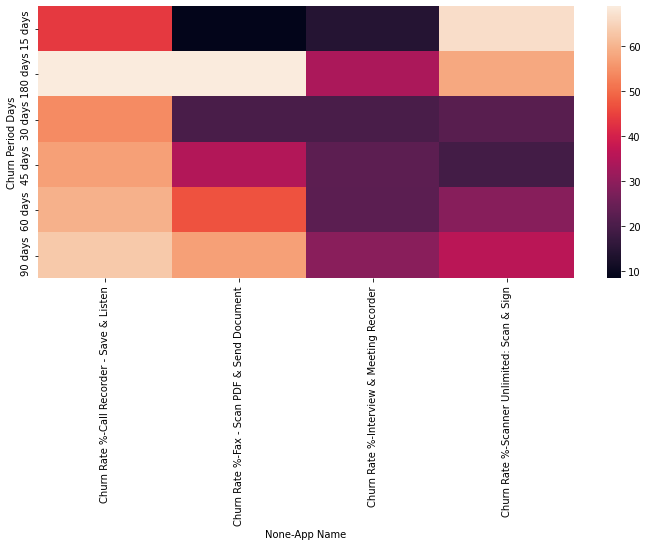

In [ ]:
plt.subplots(figsize=(12,5))
df_map = sns.heatmap(df_pivot)

The highest churn rate in the Call Recorder app is in Canada, with a decrease from 90% to 70%. Let's look at the package details.

For the Call Recorder Week Trial V2 package, we see 90% and 100% churn rates. In addition, the Call Recorder Week Trial package attracts more attention in the weekly packages, and the churn rates are decreasing. We can clearly see that the yearly packages for this application do not attract the attention of the users.

In [ ]:
call_ca_last180 = df_pack[(df_pack["Original Start Date"] > last180) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last180["Churn Rate %"] = call_ca_last180["Total Churn"]/call_ca_last180["newSubs"]*100
call_ca_last180["Churn Period Days"] = "180 days"

call_ca_last90 = df_pack[(df_pack["Original Start Date"] > last90) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last90["Churn Rate %"] = call_ca_last90["Total Churn"]/call_ca_last90["newSubs"]*100
call_ca_last90["Churn Period Days"] = "90 days"

call_ca_last60 = df_pack[(df_pack["Original Start Date"] > last60) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last60["Churn Rate %"] = call_ca_last60["Total Churn"]/call_ca_last60["newSubs"]*100
call_ca_last60["Churn Period Days"] = "60 days"

call_ca_last30 = df_pack[(df_pack["Original Start Date"] > last30) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last30["Churn Rate %"] = call_ca_last30["Total Churn"]/call_ca_last30["newSubs"]*100
call_ca_last30["Churn Period Days"] = "30 days"

call_ca_last45 = df_pack[(df_pack["Original Start Date"] > last45) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last45["Churn Rate %"] = call_ca_last45["Total Churn"]/call_ca_last45["newSubs"]*100
call_ca_last45["Churn Period Days"] = "45 days"

call_ca_last15 = df_pack[(df_pack["Original Start Date"] > last15) & 
                        (df_pack["Country Code"] == "CA") & 
                        (df_pack["App Name"] == "Call Recorder - Save & Listen")].groupby("Subscription Name")[["newSubs","Total Churn"]].sum().reset_index().sort_values(["newSubs","Total Churn"], ascending = False)
call_ca_last15["Churn Rate %"] = call_ca_last15["Total Churn"]/call_ca_last15["newSubs"]*100
call_ca_last15["Churn Period Days"] = "15 days"

call_ca_all = pd.concat([call_ca_last180, call_ca_last90, call_ca_last60,call_ca_last45, call_ca_last30,call_ca_last15])
call_ca_pivot = pd.pivot_table(call_ca_all, values = ["Churn Rate %"], index = ["Subscription Name"],columns = "Churn Period Days",
                         aggfunc = {"Churn Rate %": np.mean}).sort_index()
call_ca_pivot

Churn Rate %                          \
Churn Period Days                     15 days    180 days     30 days   
Subscription Name                                                       
Call Recorder 1 Month                     NaN    0.000000    0.000000   
Call Recorder Month                 11.111111   74.050633   40.000000   
Call Recorder Month Trial $19.99          NaN  500.000000         NaN   
Call Recorder Week                        NaN         inf         NaN   
Call Recorder Week Trial            83.673469   96.920290   86.138614   
Call Recorder Week Trial V2               NaN   90.697674  100.000000   
Call Recorder Year Trial V2               NaN    0.000000         NaN   
Monthly v3                                NaN   76.190476         NaN   
Yearly v4                                 NaN    0.000000    0.000000   

                                                                      
Churn Period Days                    45 days     60 days     90 days  
Subscription Name                                                     
Call Recorder 1 Month               0.000000    0.000000    0.000000  
Call Recorder Month                41.025641   53.448276   61.956522  
Call Recorder Month Trial $19.99         NaN         NaN         NaN  
Call Recorder Week                       NaN         inf         inf  
Call Recorder Week Trial           86.956522   88.940092   93.432836  
Call Recorder Week Trial V2       100.000000  100.000000  100.000000  
Call Recorder Year Trial V2              NaN         NaN         NaN  
Monthly v3                               NaN         NaN         NaN  
Yearly v4                           0.000000    0.000000    0.000000

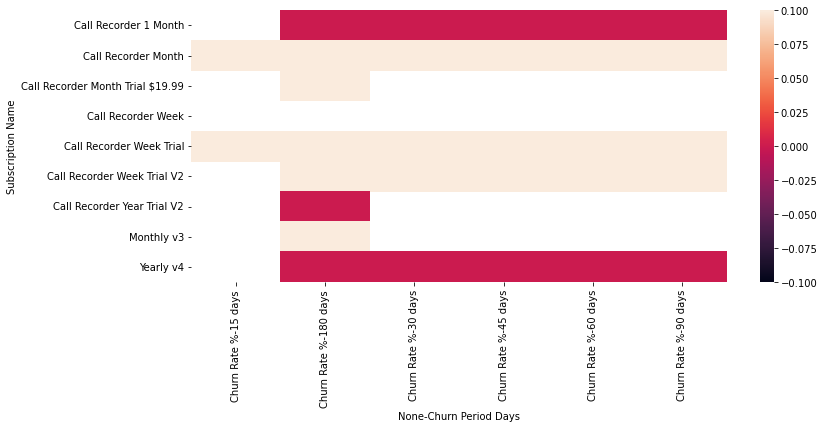

In [ ]:
plt.subplots(figsize=(12,5))
call_ca_fig = sns.heatmap(call_ca_pivot)

**RETENTION RATE & COHORT ANALYSIS**

In [ ]:
ks_pack

,Subscription Apple ID,Subscription Name
0,1446242014,Call Recorder Month Trial V2
1,1435776429,Call Recorder Month
2,1535635450,Monthly one person v2
3,1439369591,Scanner Pro Year Trial
4,1548625377,Fax Month v2
...,...,...
35492,1502520907,Scanner Pro Consumable Seven
39888,1535634658,3 Months One
50065,1602817430,Monthly
50433,1579300056,Call Blocker Manage Subs Monthly


In [ ]:
df_ret = pd.merge(df, ks_pack,
                  left_on = "Package ID", right_on = "Subscription Apple ID",
                  how = "inner")
df_ret

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name,Subscription Apple ID,Subscription Name
0,2021-01-02,1529230328,AL,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call,1529234098,Monthly One Person
1,2021-01-03,1529230328,AZ,1529234098,7 Days,0,1,0,1,Earni: Earn Money & Video Call,1529234098,Monthly One Person
2,2021-01-05,1529230328,AZ,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person
3,2021-01-01,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person
4,2021-01-02,1529230328,KH,1529234098,7 Days,0,1,0,0,Earni: Earn Money & Video Call,1529234098,Monthly One Person
...,...,...,...,...,...,...,...,...,...,...,...,...
48149,2021-12-24,1589919997,US,1591424077,Non Duration - Lifetime,2,2,1,0,App Vault: Hide Photos & Files,1591424077,Lifetime
48150,2021-12-25,1589919997,US,1591424077,Non Duration - Lifetime,2,2,0,0,App Vault: Hide Photos & Files,1591424077,Lifetime
48151,2021-12-26,1589919997,US,1591424077,Non Duration - Lifetime,3,3,0,0,App Vault: Hide Photos & Files,1591424077,Lifetime
48152,2021-12-27,1589919997,US,1591424077,Non Duration - Lifetime,1,1,1,0,App Vault: Hide Photos & Files,1591424077,Lifetime


In [ ]:
df_ret.duplicated().sum()

0

In [ ]:
ret_call = df_ret[df_ret["Subscription Name"] == "Call Recorder Month"]
ret_call.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name,Subscription Apple ID,Subscription Name
14121,2021-01-04,1435773823,JP,1435776429,NaN,0,0,0,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month
14122,2021-01-03,1435773823,US,1435776429,Non Duration,1,1,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month
14123,2021-01-11,1435773823,JP,1435776429,NaN,0,0,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month
14124,2021-01-07,1435773823,US,1435776429,NaN,0,0,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month
14125,2021-02-02,1435773823,CA,1435776429,NaN,0,0,0,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month


In [ ]:
import datetime as dt
ret_call["Yearmonth"] = pd.to_datetime(ret_call["Original Start Date"].dt.strftime('%Y-%m'))
ret_call.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Original Start Date,App Apple ID,Country Code,Package ID,Intro Duration,newSubs,Engagement,Total Churn,Cancel from Introductory,App Name,Subscription Apple ID,Subscription Name,Yearmonth
14121,2021-01-04,1435773823,JP,1435776429,NaN,0,0,0,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month,2021-01-01
14122,2021-01-03,1435773823,US,1435776429,Non Duration,1,1,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month,2021-01-01
14123,2021-01-11,1435773823,JP,1435776429,NaN,0,0,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month,2021-01-01
14124,2021-01-07,1435773823,US,1435776429,NaN,0,0,1,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month,2021-01-01
14125,2021-02-02,1435773823,CA,1435776429,NaN,0,0,0,0,Call Recorder - Save & Listen,1435776429,Call Recorder Month,2021-02-01


In [ ]:
ret_call_tot = ret_call.groupby(["Yearmonth"])["newSubs"].sum().reset_index()
ret_call_tot

,Yearmonth,newSubs
0,2021-01-01,1
1,2021-02-01,1
2,2021-03-01,35
3,2021-04-01,177
4,2021-05-01,331
5,2021-06-01,314
6,2021-07-01,396
7,2021-08-01,322
8,2021-09-01,432
9,2021-10-01,610


In [ ]:
c1_cohort.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Period,Value
0,2019-12-01,1435773823,KR,1487914502,I,1 Month,C,0,5
1,2019-12-29,1435773823,KR,1446241754,T,3 Days,C,0,11
2,2019-11-24,1435773823,KR,1446242014,T,3 Days,C,1,2
3,2019-12-02,1435773823,KR,1487914502,I,1 Month,C,0,10
4,2019-12-30,1435773823,KR,1446241754,T,3 Days,C,0,33


In [ ]:
c1_cohort_ret = c1_cohort[(c1_cohort["Package ID"] == 1435776429) & (c1_cohort["Original Start Date"] <= "2021-12-31") & 
                          (c1_cohort["Original Start Date"] >= "2021-01-01") & (c1_cohort["Type"] == "C") ]
c1_cohort_ret.head()

,Original Start Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Period,Value
40690,2021-01-03,1435773823,US,1435776429,S,Non Duration,C,1,1
49232,2021-03-08,1435773823,US,1435776429,NaN,NaN,C,1,2
49578,2021-03-09,1435773823,US,1435776429,S,Non Duration,C,1,1
49996,2021-03-12,1435773823,US,1435776429,S,Non Duration,C,1,1
50006,2021-03-13,1435773823,US,1435776429,S,Non Duration,C,1,1


In [ ]:
c1_cohort_ret["Yearmonth"] = pd.to_datetime(c1_cohort_ret["Original Start Date"].dt.strftime('%Y-%m'))
c1_cohort_ret.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Original Start Date,App Apple ID,Country Code,Package ID,Intro Type,Intro Duration,Type,Period,Value,Yearmonth
40690,2021-01-03,1435773823,US,1435776429,S,Non Duration,C,1,1,2021-01-01
49232,2021-03-08,1435773823,US,1435776429,NaN,NaN,C,1,2,2021-03-01
49578,2021-03-09,1435773823,US,1435776429,S,Non Duration,C,1,1,2021-03-01
49996,2021-03-12,1435773823,US,1435776429,S,Non Duration,C,1,1,2021-03-01
50006,2021-03-13,1435773823,US,1435776429,S,Non Duration,C,1,1,2021-03-01


In [ ]:
c1_cohort_ret = c1_cohort_ret.drop(["App Apple ID","Package ID","Intro Type","Type"],axis = 1)


In [ ]:
c1_cohort_ret.sort_values("Yearmonth")

,Original Start Date,Country Code,Intro Duration,Period,Value,Yearmonth
40690,2021-01-03,US,Non Duration,1,1,2021-01-01
62372,2021-01-15,US,NaN,6,1,2021-01-01
77900,2021-01-11,JP,NaN,9,1,2021-01-01
82032,2021-02-15,PK,NaN,12,1,2021-02-01
82614,2021-03-12,US,Non Duration,8,1,2021-03-01
...,...,...,...,...,...,...
91640,2021-12-03,US,Non Duration,1,3,2021-12-01
91601,2021-12-03,GB,Non Duration,1,1,2021-12-01
91578,2021-12-05,TR,Non Duration,1,1,2021-12-01
91826,2021-12-06,IN,Non Duration,1,1,2021-12-01


In [ ]:
c1_cohort_ret

,Original Start Date,Country Code,Intro Duration,Period,Value,Yearmonth
40690,2021-01-03,US,Non Duration,1,1,2021-01-01
49232,2021-03-08,US,NaN,1,2,2021-03-01
49578,2021-03-09,US,Non Duration,1,1,2021-03-01
49996,2021-03-12,US,Non Duration,1,1,2021-03-01
50006,2021-03-13,US,Non Duration,1,1,2021-03-01
...,...,...,...,...,...,...
93713,2021-10-16,US,Non Duration,3,2,2021-10-01
93714,2021-12-16,US,Non Duration,1,5,2021-12-01
93719,2021-04-16,US,Non Duration,9,1,2021-04-01
93730,2021-12-16,BR,Non Duration,1,1,2021-12-01


In [ ]:
ret_call_org = ret_call.drop(["App Apple ID","Package ID","newSubs","Engagement","Cancel from Introductory","App Name","Subscription Apple ID","Subscription Name"], axis =1)

In [ ]:
retention_df = pd.merge(ret_call_org, c1_cohort_ret, on= ["Original Start Date","Country Code","Intro Duration","Yearmonth"], how = "inner")
retention_df.head()

,Original Start Date,Country Code,Intro Duration,Total Churn,Yearmonth,Period,Value
0,2021-01-03,US,Non Duration,1,2021-01-01,1,1
1,2021-01-11,JP,NaN,1,2021-01-01,9,1
2,2021-03-02,US,NaN,2,2021-03-01,2,1
3,2021-03-02,US,NaN,2,2021-03-01,3,1
4,2021-03-08,US,NaN,3,2021-03-01,1,2


In [ ]:
retention_df2 = retention_df.groupby(["Yearmonth","Period"])["Total Churn"].sum().reset_index()
retention_df2 = retention_df2.groupby("Yearmonth").apply(lambda x: x.sort_values(["Period"],ascending = True)).reset_index(drop = True)
retention_df2

,Yearmonth,Period,Total Churn
0,2021-01-01,1,1
1,2021-01-01,6,1
2,2021-01-01,9,1
3,2021-02-01,12,1
4,2021-03-01,1,25
...,...,...,...
56,2021-10-01,4,14
57,2021-11-01,1,344
58,2021-11-01,2,57
59,2021-11-01,4,2


In [ ]:
retention_final = pd.merge(retention_df2,ret_call_tot, on = "Yearmonth",how ="right")
retention_final

,Yearmonth,Period,Total Churn,newSubs
0,2021-01-01,1,1,1
1,2021-01-01,6,1,1
2,2021-01-01,9,1,1
3,2021-02-01,12,1,1
4,2021-03-01,1,25,35
...,...,...,...,...
56,2021-10-01,4,14,610
57,2021-11-01,1,344,519
58,2021-11-01,2,57,519
59,2021-11-01,4,2,519


In [ ]:
retention_final["retention_rate"] = ((retention_final['Total Churn']/retention_final['newSubs'])*100).round(2)
retention_final

,Yearmonth,Period,Total Churn,newSubs,retention_rate
0,2021-01-01,1,1,1,100.00
1,2021-01-01,6,1,1,100.00
2,2021-01-01,9,1,1,100.00
3,2021-02-01,12,1,1,100.00
4,2021-03-01,1,25,35,71.43
...,...,...,...,...,...
56,2021-10-01,4,14,610,2.30
57,2021-11-01,1,344,519,66.28
58,2021-11-01,2,57,519,10.98
59,2021-11-01,4,2,519,0.39


In [ ]:
retention_cohort = retention_final.pivot(index='Yearmonth',
                                  columns='Period',
                                  values='retention_rate')
retention_cohort

Period,1,2,3,4,5,6,7,8,9,10,12,14
Yearmonth,,,,,,,,,,,,
2021-01-01,100.00,NaN,NaN,NaN,NaN,100.00,NaN,NaN,100.00,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN
2021-03-01,71.43,34.29,17.14,8.57,8.57,NaN,NaN,8.57,NaN,NaN,NaN,NaN
2021-04-01,88.14,55.93,34.46,39.55,10.73,23.16,4.52,4.52,5.08,5.08,NaN,NaN
2021-05-01,78.55,25.68,13.60,16.92,9.37,0.30,2.72,1.21,NaN,NaN,NaN,0.91
2021-06-01,65.92,16.88,8.60,4.46,7.32,3.82,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,69.19,13.38,11.87,8.84,6.57,0.51,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,64.29,24.84,10.25,8.39,3.42,0.31,NaN,NaN,NaN,0.62,NaN,NaN
2021-09-01,71.06,24.07,15.28,3.24,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN


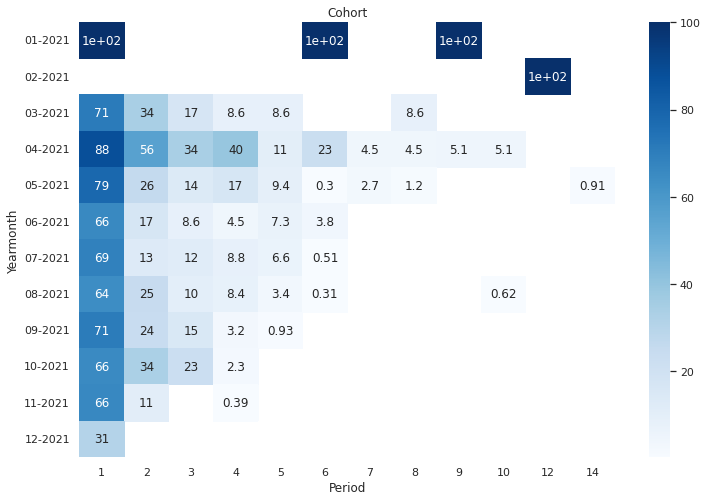

In [ ]:
retention_cohort.index = retention_cohort.index.strftime('%m-%Y')
sns.set(style = 'white')
plt.figure(figsize = (12, 8))
plt.title('Cohort')
sns.heatmap(
            retention_cohort
            ,cmap = plt.cm.Blues
            ,annot = True
            )
plt.show()